# FORCASTING COVID-19 CASES USING META (FACEBOOK) PROPHET

## UNDERSTANDING THE BUSINESS PROBLEM

 This project analyzes the transmission of corona virus across the globe and train a time-series forcasting model (prophet) to get the projection of corona virus-related cases for the next month in the United States.

*Data Source*
- https://www.kaggle.com/datasets/sambelkacem/covid19-algeria-and-world-dataset

## IMPORTING DATASETS AND LIBRARIES

In [1]:
# !pip install prophet
# !pip install plotly

In [3]:
import pandas as pd
import numpy as np
from tensorflow import keras
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.figure_factory as ff
from prophet import Prophet
from sklearn.metrics import r2_score

In [5]:
# Import the data

covid_df = pd.read_csv('covid_data.csv')
covid_df


# Entity: Country Name
# Date: Date on which records were observed
# Cases: Number of confirmed Covid-19 cases
# Deaths: Number of confirmed Covid-19 related deaths
# Daily tests: Number of tests taken in the country
# Iso_alpha: ISO code for countries
# Month: Month of observation

Entity        Date      Cases    Deaths  Daily tests iso_alpha   
0             Mexico  2020-01-01        0.0       0.0         25.0       MEX  \
1             Mexico  2020-01-02        0.0       0.0         72.0       MEX   
2             Mexico  2020-01-03        0.0       0.0         89.0       MEX   
3           Thailand  2020-01-04        0.0       0.0          2.0       THA   
4             Mexico  2020-01-04        0.0       0.0         45.0       MEX   
...              ...         ...        ...       ...          ...       ...   
20640   Saudi Arabia  2020-10-31   346880.0    5383.0      44840.0       SAU   
20641  United States  2020-10-31  9047427.0  229708.0    1161427.0       USA   
20642   South Africa  2020-10-31   723682.0   19230.0      22150.0       ZAF   
20643         Malawi  2020-10-31     5923.0     184.0          0.0       MWI   
20644       Pakistan  2020-10-31   332993.0    6806.0      21688.0       PAK   

       month  
0          1  
1          1  
2          1  
3          1  
4          1  
...      ...  
20640     10  
20641     10  
20642     10  
20643     10  
20644     10  

[20645 rows x 7 columns]


- Number of samples in the dataframe = 20,645

In [12]:
len(covid_df)

20645

## EXPLORATORY DATA ANALYSIS

In [15]:
# Checking null values
covid_df.isnull().sum()

Entity         0
Date           0
Cases          0
Deaths         0
Daily tests    0
iso_alpha      0
month          0
dtype: int64

In [16]:
# Getting dataframe info
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20645 entries, 0 to 20644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Entity       20645 non-null  object 
 1   Date         20645 non-null  object 
 2   Cases        20645 non-null  float64
 3   Deaths       20645 non-null  float64
 4   Daily tests  20645 non-null  float64
 5   iso_alpha    20645 non-null  object 
 6   month        20645 non-null  int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 1.1+ MB


In [17]:
# Statistical data of the dataframe
covid_df.describe()

Cases         Deaths   Daily tests         month
count  2.064500e+04   20645.000000  2.064500e+04  20645.000000
mean   1.247184e+05    4693.475902  2.248130e+04      6.401259
std    6.068402e+05   17873.361923  1.055780e+05      2.399602
min    0.000000e+00       0.000000 -3.743000e+03      1.000000
25%    1.086000e+03      11.000000  9.700000e+01      4.000000
50%    8.698000e+03     196.000000  2.216000e+03      6.000000
75%    5.545200e+04    1522.000000  1.025400e+04      8.000000
max    9.047427e+06  229708.000000  1.492409e+06     10.000000

In [30]:
# Sort the dataframe by Date
covid_df = covid_df.sort_values(by = 'Date')
covid_df

Entity        Date      Cases    Deaths  Daily tests iso_alpha   
0              Mexico  2020-01-01        0.0       0.0         25.0       MEX  \
1              Mexico  2020-01-02        0.0       0.0         72.0       MEX   
2              Mexico  2020-01-03        0.0       0.0         89.0       MEX   
4              Mexico  2020-01-04        0.0       0.0         45.0       MEX   
3            Thailand  2020-01-04        0.0       0.0          2.0       THA   
...               ...         ...        ...       ...          ...       ...   
20615           Ghana  2020-10-31    48055.0     320.0          0.0       GHA   
20585       Australia  2020-10-31    27582.0     907.0          0.0       AUS   
20565         Croatia  2020-10-31    46547.0     531.0       8741.0       HRV   
20605  Czech Republic  2020-10-31   323673.0    3078.0      36287.0       CZE   
20641   United States  2020-10-31  9047427.0  229708.0    1161427.0       USA   

       month  
0          1  
1          1  
2          1  
4          1  
3          1  
...      ...  
20615     10  
20585     10  
20565     10  
20605     10  
20641     10  

[20645 rows x 7 columns]

In [31]:
# Print the number of countries considered
covid_df['Entity'].nunique()

83

83 unique countries (entities)

In [32]:
covid_df['Entity'].unique()

array(['Mexico', 'Thailand', 'Japan', 'United States', 'Switzerland',
       'Vietnam', 'France', 'Nepal', 'Malaysia', 'Australia', 'Canada',
       'Israel', 'Denmark', 'Czech Republic', 'Sri Lanka', 'India',
       'Philippines', 'Finland', 'Italy', 'United Kingdom', 'Sweden',
       'Belgium', 'South Africa', 'Guatemala', 'Iran', 'Morocco',
       'Bahrain', 'Norway', 'Kuwait', 'Oman', 'Iraq', 'Croatia',
       'Algeria', 'Austria', 'Iceland', 'Serbia', 'Pakistan', 'Romania',
       'Greece', 'Nigeria', 'New Zealand', 'Senegal', 'Ecuador',
       'Ireland', 'Portugal', 'Saudi Arabia', 'Dominican Republic',
       'Indonesia', 'Bangladesh', 'Jordan', 'Tunisia', 'Togo', 'Poland',
       'Chile', 'Libya', 'Hungary', 'Slovenia', 'Peru', 'Colombia',
       'Costa Rica', 'Paraguay', 'Bulgaria', 'Panama', 'Turkey',
       'Jamaica', 'Bolivia', 'Cuba', 'Ghana', 'Trinidad and Tobago',
       'Ethiopia', 'Kenya', 'Uruguay', 'Namibia', 'Rwanda', 'Mauritania',
       'El Salvador', 'Zambia', 'M

In [33]:
# Printing the names of Countries
print('Countries on which have data are:\n')

for i in covid_df['Entity'].unique():
      print(i+'\n')

Countries on which have data are:

Mexico

Thailand

Japan

United States

Switzerland

Vietnam

France

Nepal

Malaysia

Australia

Canada

Israel

Denmark

Czech Republic

Sri Lanka

India

Philippines

Finland

Italy

United Kingdom

Sweden

Belgium

South Africa

Guatemala

Iran

Morocco

Bahrain

Norway

Kuwait

Oman

Iraq

Croatia

Algeria

Austria

Iceland

Serbia

Pakistan

Romania

Greece

Nigeria

New Zealand

Senegal

Ecuador

Ireland

Portugal

Saudi Arabia

Dominican Republic

Indonesia

Bangladesh

Jordan

Tunisia

Togo

Poland

Chile

Libya

Hungary

Slovenia

Peru

Colombia

Costa Rica

Paraguay

Bulgaria

Panama

Turkey

Jamaica

Bolivia

Cuba

Ghana

Trinidad and Tobago

Ethiopia

Kenya

Uruguay

Namibia

Rwanda

Mauritania

El Salvador

Zambia

Madagascar

Zimbabwe

Uganda

Mozambique

Myanmar

Malawi



## INTERACTIVE DATA VISUALIZATION - PART #1

In [35]:
# Function to plot interative plot plot

def interactive_plot (df, column_name, title):
    fig = px.line(title = title)
    for i in df['Entity'].unique():
        d = df[df['Entity']== i]
        fig.add_scatter (x = d['Date'], y= d[column_name], name = i)
    fig.show()

In [36]:
# Plot interactive chart
interactive_plot (covid_df, 'Cases', 'Number of covid cases')

- Graph shows that United states had the highest number of covid cases
- India was the second highest

In [38]:
# Plot interactive chart
interactive_plot(covid_df, 'Daily tests', 'Number of Daily Tests')

In [39]:
# Plot interactive chart -number of deaths for all countries
interactive_plot(covid_df, 'Deaths', 'Number of deaths for all countries')

Top 5 countries with highest number of deaths
1. United States
2. India
3. Mexico
4. United Kingdom
5. Italy

## INTERACTIVE DATA VISUALIZATION - PART #2

In [40]:
covid_df

Entity        Date      Cases    Deaths  Daily tests iso_alpha   
0              Mexico  2020-01-01        0.0       0.0         25.0       MEX  \
1              Mexico  2020-01-02        0.0       0.0         72.0       MEX   
2              Mexico  2020-01-03        0.0       0.0         89.0       MEX   
4              Mexico  2020-01-04        0.0       0.0         45.0       MEX   
3            Thailand  2020-01-04        0.0       0.0          2.0       THA   
...               ...         ...        ...       ...          ...       ...   
20615           Ghana  2020-10-31    48055.0     320.0          0.0       GHA   
20585       Australia  2020-10-31    27582.0     907.0          0.0       AUS   
20565         Croatia  2020-10-31    46547.0     531.0       8741.0       HRV   
20605  Czech Republic  2020-10-31   323673.0    3078.0      36287.0       CZE   
20641   United States  2020-10-31  9047427.0  229708.0    1161427.0       USA   

       month  
0          1  
1          1  
2          1  
4          1  
3          1  
...      ...  
20615     10  
20585     10  
20565     10  
20605     10  
20641     10  

[20645 rows x 7 columns]

In [43]:
fig = px.choropleth(covid_df, locations= 'iso_alpha',# locations iso code
                    color = 'Cases',  # column representing the color itensity
                    animation_frame= 'month') # timeframe for animation
fig.show()

In [16]:
# Covid deaths animation from January 2020 to November 2020
fig = px.choropleth(covid_df, locations = "iso_alpha", # locations iso code
                    color = 'Deaths', # column representing the color itensity
                    hover_name = "Entity", # column to add to hover information
                    animation_frame = 'month') # timeframe for animation

fig.show()

In [17]:
# Covid testing animation from January 2020 to November 2020
fig = px.choropleth(covid_df, locations = "iso_alpha", # locations iso code
                    color = 'Daily tests', # column representing the color itensity
                    hover_name = "Entity", # column to add to hover information
                    animation_frame = 'month') # timeframe for animation
fig.show()

- Annimateing the number of cases plot based on Dates instead of months

In [44]:
# Covid cases animation by dates
fig = px.choropleth(covid_df, locations = "iso_alpha", # locations iso code
                    color = 'Cases', # column representing the color itensity
                    hover_name = "Entity", # column to add to hover information
                    animation_frame = 'Date') # timeframe for animation
fig.show()

## PREPARING THE DATA TO FEED THE PROPHET MODEL

In [45]:
covid_df

Entity        Date      Cases    Deaths  Daily tests iso_alpha   
0              Mexico  2020-01-01        0.0       0.0         25.0       MEX  \
1              Mexico  2020-01-02        0.0       0.0         72.0       MEX   
2              Mexico  2020-01-03        0.0       0.0         89.0       MEX   
4              Mexico  2020-01-04        0.0       0.0         45.0       MEX   
3            Thailand  2020-01-04        0.0       0.0          2.0       THA   
...               ...         ...        ...       ...          ...       ...   
20615           Ghana  2020-10-31    48055.0     320.0          0.0       GHA   
20585       Australia  2020-10-31    27582.0     907.0          0.0       AUS   
20565         Croatia  2020-10-31    46547.0     531.0       8741.0       HRV   
20605  Czech Republic  2020-10-31   323673.0    3078.0      36287.0       CZE   
20641   United States  2020-10-31  9047427.0  229708.0    1161427.0       USA   

       month  
0          1  
1          1  
2          1  
4          1  
3          1  
...      ...  
20615     10  
20585     10  
20565     10  
20605     10  
20641     10  

[20645 rows x 7 columns]

In [46]:
# focus on US data for the forcasting

# Get the data corresponding to the United States only

US_df = covid_df[covid_df['Entity'] == 'United States']
US_df

Entity        Date      Cases    Deaths  Daily tests iso_alpha   
43     United States  2020-01-21        1.0       0.0          0.0       USA  \
47     United States  2020-01-22        1.0       0.0          0.0       USA   
52     United States  2020-01-23        1.0       0.0          0.0       USA   
59     United States  2020-01-24        1.0       0.0          0.0       USA   
62     United States  2020-01-25        2.0       0.0          0.0       USA   
...              ...         ...        ...       ...          ...       ...   
20244  United States  2020-10-27  8704524.0  225735.0    1229458.0       USA   
20368  United States  2020-10-28  8779653.0  226723.0    1355447.0       USA   
20410  United States  2020-10-29  8858024.0  227700.0    1366664.0       USA   
20489  United States  2020-10-30  8946154.0  228668.0    1414156.0       USA   
20641  United States  2020-10-31  9047427.0  229708.0    1161427.0       USA   

       month  
43         1  
47         1  
52         1  
59         1  
62         1  
...      ...  
20244     10  
20368     10  
20410     10  
20489     10  
20641     10  

[285 rows x 7 columns]

In [47]:
# Only obtain the date and cases columns
US_df = US_df[['Date', 'Cases']]
US_df

Date      Cases
43     2020-01-21        1.0
47     2020-01-22        1.0
52     2020-01-23        1.0
59     2020-01-24        1.0
62     2020-01-25        2.0
...           ...        ...
20244  2020-10-27  8704524.0
20368  2020-10-28  8779653.0
20410  2020-10-29  8858024.0
20489  2020-10-30  8946154.0
20641  2020-10-31  9047427.0

[285 rows x 2 columns]

In [48]:
# reset index
US_df.reset_index(inplace=True, drop=True)  
US_df

Date      Cases
0    2020-01-21        1.0
1    2020-01-22        1.0
2    2020-01-23        1.0
3    2020-01-24        1.0
4    2020-01-25        2.0
..          ...        ...
280  2020-10-27  8704524.0
281  2020-10-28  8779653.0
282  2020-10-29  8858024.0
283  2020-10-30  8946154.0
284  2020-10-31  9047427.0

[285 rows x 2 columns]

In [50]:
# change column names that are expected by prophet algorithm
US_df.columns = ['ds', 'y']
US_df

ds          y
0    2020-01-21        1.0
1    2020-01-22        1.0
2    2020-01-23        1.0
3    2020-01-24        1.0
4    2020-01-25        2.0
..          ...        ...
280  2020-10-27  8704524.0
281  2020-10-28  8779653.0
282  2020-10-29  8858024.0
283  2020-10-30  8946154.0
284  2020-10-31  9047427.0

[285 rows x 2 columns]

In [51]:
# Split the data into testing and training datasets
# training data is up until October 1
#testing data is October 1 and up
train , test = US_df[ US_df['ds'] <= '2020-09-30'], US_df[US_df['ds'] >=  '2020-10-01']

In [53]:
train

ds          y
0    2020-01-21        1.0
1    2020-01-22        1.0
2    2020-01-23        1.0
3    2020-01-24        1.0
4    2020-01-25        2.0
..          ...        ...
249  2020-09-26  7033430.0
250  2020-09-27  7078798.0
251  2020-09-28  7115046.0
252  2020-09-29  7148044.0
253  2020-09-30  7191061.0

[254 rows x 2 columns]

In [54]:
test

ds          y
254  2020-10-01  7233043.0
255  2020-10-02  7277814.0
256  2020-10-03  7332285.0
257  2020-10-04  7382944.0
258  2020-10-05  7417845.0
259  2020-10-06  7458550.0
260  2020-10-07  7501612.0
261  2020-10-08  7549794.0
262  2020-10-09  7606594.0
263  2020-10-10  7664676.0
264  2020-10-11  7718947.0
265  2020-10-12  7762544.0
266  2020-10-13  7804197.0
267  2020-10-14  7856714.0
268  2020-10-15  7916100.0
269  2020-10-16  7979885.0
270  2020-10-17  8050141.0
271  2020-10-18  8106752.0
272  2020-10-19  8154595.0
273  2020-10-20  8214755.0
274  2020-10-21  8273304.0
275  2020-10-22  8336282.0
276  2020-10-23  8408340.0
277  2020-10-24  8493669.0
278  2020-10-25  8576725.0
279  2020-10-26  8636165.0
280  2020-10-27  8704524.0
281  2020-10-28  8779653.0
282  2020-10-29  8858024.0
283  2020-10-30  8946154.0
284  2020-10-31  9047427.0

- Obtaining the data for 'Canada' 

In [55]:
canada_df = covid_df[covid_df['Entity'] == 'Canada']
canada_df

Entity        Date     Cases   Deaths  Daily tests iso_alpha  month
78     Canada  2020-01-26       1.0      0.0          0.0       CAN      1
80     Canada  2020-01-27       1.0      0.0          0.0       CAN      1
94     Canada  2020-01-28       2.0      0.0          0.0       CAN      1
115    Canada  2020-01-29       3.0      0.0          0.0       CAN      1
130    Canada  2020-01-30       3.0      0.0          0.0       CAN      1
...       ...         ...       ...      ...          ...       ...    ...
20291  Canada  2020-10-27  220213.0   9973.0      80889.0       CAN     10
20392  Canada  2020-10-28  222887.0  10001.0      55672.0       CAN     10
20444  Canada  2020-10-29  225586.0  10032.0      63142.0       CAN     10
20556  Canada  2020-10-30  228542.0  10074.0      62843.0       CAN     10
20580  Canada  2020-10-31  231999.0  10110.0      65562.0       CAN     10

[280 rows x 7 columns]

In [57]:
canada_df= canada_df[['Date', 'Cases']]
canada_df

Date     Cases
78     2020-01-26       1.0
80     2020-01-27       1.0
94     2020-01-28       2.0
115    2020-01-29       3.0
130    2020-01-30       3.0
...           ...       ...
20291  2020-10-27  220213.0
20392  2020-10-28  222887.0
20444  2020-10-29  225586.0
20556  2020-10-30  228542.0
20580  2020-10-31  231999.0

[280 rows x 2 columns]

In [58]:
canada_df.reset_index(inplace=True, drop=True)  
canada_df

Date     Cases
0    2020-01-26       1.0
1    2020-01-27       1.0
2    2020-01-28       2.0
3    2020-01-29       3.0
4    2020-01-30       3.0
..          ...       ...
275  2020-10-27  220213.0
276  2020-10-28  222887.0
277  2020-10-29  225586.0
278  2020-10-30  228542.0
279  2020-10-31  231999.0

[280 rows x 2 columns]

In [59]:
canada_df.columns = ['ds', 'y']
canada_df

ds         y
0    2020-01-26       1.0
1    2020-01-27       1.0
2    2020-01-28       2.0
3    2020-01-29       3.0
4    2020-01-30       3.0
..          ...       ...
275  2020-10-27  220213.0
276  2020-10-28  222887.0
277  2020-10-29  225586.0
278  2020-10-30  228542.0
279  2020-10-31  231999.0

[280 rows x 2 columns]

# TRAINING THE PROPHET MODEL

In [74]:
m = Prophet()

In [75]:
# Create and fit the prophet model to the training data
m.fit(train)

17:31:06 - cmdstanpy - INFO - Chain [1] start processing
17:31:06 - cmdstanpy - INFO - Chain [1] done processing


In [76]:
# We are going to forecast for 31 days, so we get the dataframe contain dates which includes our training
# dates as well as 31 days into the future, for forecasting.
future = m.make_future_dataframe(periods=31)

In [77]:
# Make prediction 
forecast =m.predict(future)
# 'yhat' is the mean predicted values and the 'yhat_lower' and 'yhat_upper' represent the lower and upper
# predicted boundaries

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds          yhat    yhat_lower    yhat_upper
280 2020-10-27  8.300728e+06  8.113006e+06  8.463237e+06
281 2020-10-28  8.341874e+06  8.141955e+06  8.513950e+06
282 2020-10-29  8.382725e+06  8.176926e+06  8.559224e+06
283 2020-10-30  8.424946e+06  8.201370e+06  8.618433e+06
284 2020-10-31  8.469648e+06  8.234225e+06  8.673298e+06

In [78]:
from prophet.plot import plot_plotly, plot_components_plotly

# Ploting the forecasted data

plot_plotly(m, forecast)

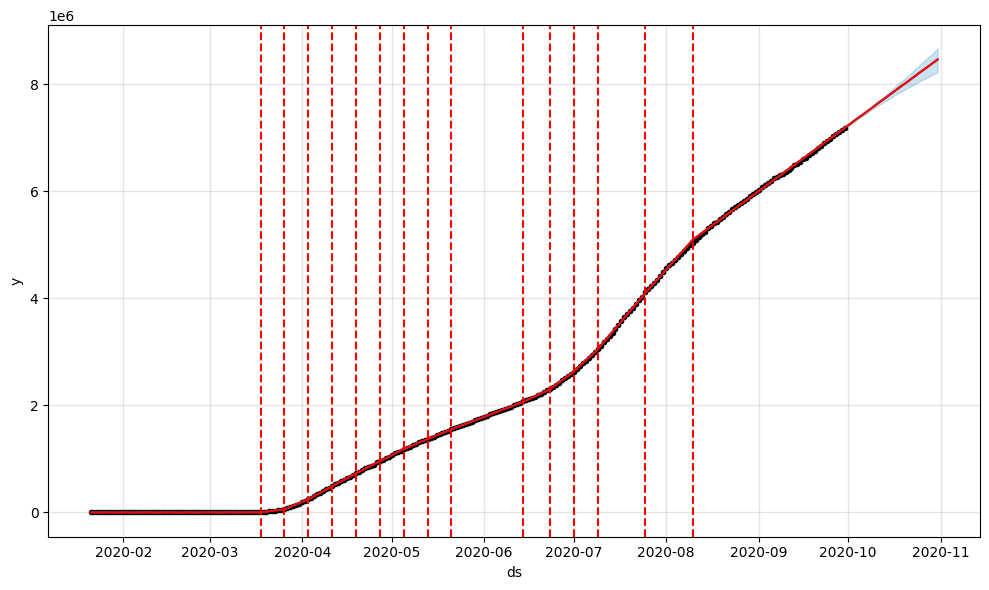

In [79]:
from prophet.plot import add_changepoints_to_plot

# This particular feature helps identify trend changes that are infered by the model - important events can be identified

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)


### Forcasting for the next 60 days 

In [69]:
future = m.make_future_dataframe(periods=60)

In [70]:
# Make prediction 
forecast =m.predict(future)
# 'yhat' is the mean predicted values and the 'yhat_lower' and 'yhat_upper' represent the lower and upper
# predicted boundaries

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


ds          yhat    yhat_lower    yhat_upper
309 2020-11-25  9.490792e+06  8.936331e+06  1.005376e+07
310 2020-11-26  9.531643e+06  8.954935e+06  1.010922e+07
311 2020-11-27  9.573864e+06  8.972283e+06  1.017162e+07
312 2020-11-28  9.618566e+06  9.009845e+06  1.023935e+07
313 2020-11-29  9.660835e+06  9.042686e+06  1.028695e+07

In [71]:
from prophet.plot import plot_plotly, plot_components_plotly

# Ploting the forecasted data

plot_plotly(m, forecast)

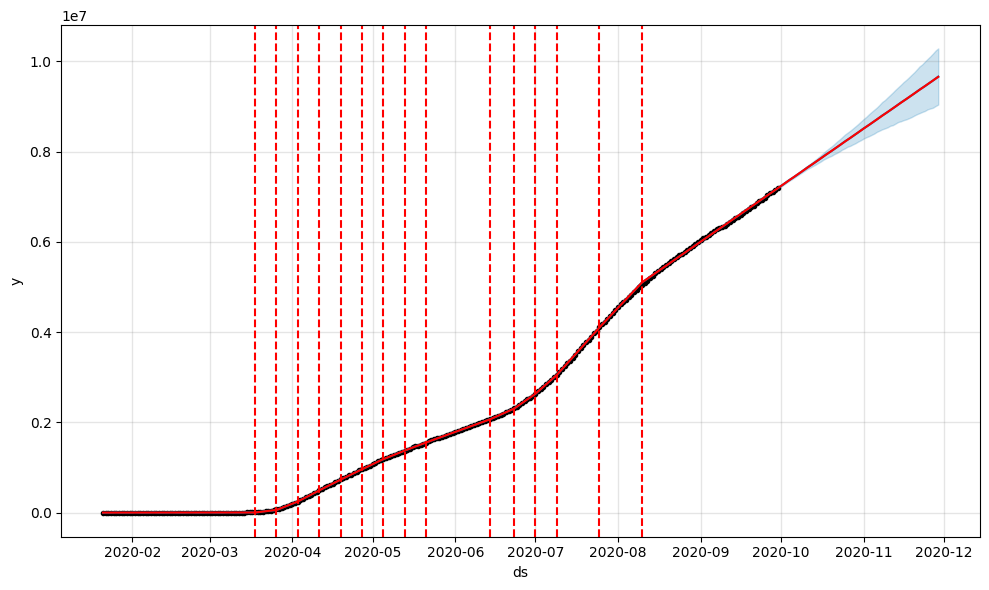

In [72]:
from prophet.plot import add_changepoints_to_plot

# This particular feature helps identify trend changes that are infered by the model - important events can be identified

fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## ASSESSING THE PERFORMANCE OF THE MODEL

In [80]:
# Access the performance of the model

#from october 1st 


score = r2_score(test['y'], forecast[forecast['ds'] >= '2020-10-01']['trend'])

print('R-Sqaure score is {}'.format(score))

R-Sqaure score is 0.7803935858903059


Coefficient of determination of 0.78 is ok due to limited historical data for prophet to make more accurate predictions.

In [81]:
# Add the predicted values to the original dataframe for plotting purpose

US_df['predicted'] = forecast['trend']

In [82]:
US_df

ds          y     predicted
0    2020-01-21        1.0 -7.054071e+00
1    2020-01-22        1.0 -3.036400e+00
2    2020-01-23        1.0  9.812714e-01
3    2020-01-24        1.0  4.998943e+00
4    2020-01-25        2.0  9.016614e+00
..          ...        ...           ...
280  2020-10-27  8704524.0  8.302804e+06
281  2020-10-28  8779653.0  8.343837e+06
282  2020-10-29  8858024.0  8.384870e+06
283  2020-10-30  8946154.0  8.425903e+06
284  2020-10-31  9047427.0  8.466935e+06

[285 rows x 3 columns]

In [84]:
# Function to plot the forecast and the origianl values for comparison

def interactive_plot_forecasting(df, title):
    fig = px.line(title = title)
    for i in df.columns[1:]:  #iterate the y column and then predicted
        fig.add_scatter(x = df['ds'],y = df[i], name = i)
    fig.show()

In [85]:
interactive_plot_forecasting(US_df, 'Original Vs Predicted')

- The prohet model did an ok job in predicting the actual number of corona virus cases. However, it fell a little lower (littel conservative) compared to the actual number. 
- For example, in oct 29, model predicted 8.385 million cases, but in real life, there were actually 8.858 million cases that day.

Conclusion:
- We Plotted interactive maps to the global COVID-19 trends in 2020
- The Prophet model provided an ok result which could have been improved if there was more historical data to analyze.